**Project context** <br>This notebook is part of the project "Bookmakerspy", a project that aims at predicting football games results in the context of the English Premier League (based on data from 2014 to 2018) and ultimately beat bookmakers' odds.<br>
The current notebook "bookmakerspy_preprocessing_dataviz" is the second in a series of 3 notebooks. It uses the dataset output by the first notebook "bookmakerspy_data_collection" and it is followed by "bookmakerspy_modelisation".

**Notebook goal**<br>
This notebook aims at pre-processing the "df_stats_odds" dataframe by grouping or creating variables, and at exploring the data through data visualizations so as to emphasize patterns and make assumptions about potential strategies for creating a model. We have iterated over these two steps: pre-processing and data visualizations over time, meaning that some initial exploration with data visualizations has enabled us to refine the data processing steps and we have gone back and forth between these two steps. They should consequently not be approached as a linear process but more as a dynamic process where data visualization and pre-processing steps helped gaining a better understanding of the data overall.



In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_orig = pd.read_csv('df_stats_odds.csv')

In [3]:
df = df_orig.copy()

# I. Pre-processing

## 1. Removing variables that won't be used for the analysis
After a first observation, given that there is a large number of variables, we decided the remove the variables that we considered as too fine-grained, and that are already included in other more general variables.

In [4]:
df = df.drop(['home_att_goal_low_left','home_att_goal_low_centre','home_att_goal_high_left','home_att_goal_low_right','home_att_goal_high_right','home_att_goal_high_centre'],axis=1)
df = df.drop(['away_att_goal_low_left','away_att_goal_low_centre','away_att_goal_high_left','away_att_goal_low_right','away_att_goal_high_right','away_att_goal_high_centre'],axis=1)
df = df.drop(['home_att_miss_high_left','home_att_miss_high_right','home_att_miss_right','home_att_miss_left','home_att_miss_high'],axis=1)
df = df.drop(['away_att_miss_high_left','away_att_miss_high_right','away_att_miss_right','away_att_miss_left','away_att_miss_high'],axis=1)
df = df.drop(['home_att_sv_low_left','home_att_sv_low_centre','home_att_sv_low_right','home_att_sv_high_left','home_att_sv_high_centre','home_att_sv_high_right'],axis=1)
df = df.drop(['away_att_sv_low_left','away_att_sv_low_centre','away_att_sv_low_right','away_att_sv_high_left','away_att_sv_high_centre','away_att_sv_high_right'],axis=1)
df = df.drop(['home_att_post_high','home_att_post_right','home_att_post_left'],axis=1)
df = df.drop(['away_att_post_high','away_att_post_right','away_att_post_left'],axis=1)
df = df.drop(['home_fk_foul_lost','away_fk_foul_lost'],axis=1)

## 2. Removing odds not used in the context of the analysis
As we are focusing on the match results (Home, Draw or away) we removed all odds-related variables that are irrelevant in this context

In [5]:
# the following variables concern methodology
df = df.drop(['Bb1X2','BbOU','BbAH'],axis=1)
# odds that are not focused on match result itself
df = df.drop(['BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA','BbAv>2.5','BbAv<2.5','BbAHh','BbMxAHH','BbAvAHH','BbMxAHA','BbAvAHA','BbMx>2.5','BbMx<2.5'],axis=1)


## 3. Grouping variables
We decided to combine the variables accurate pass and total pass to have a ratio

In [6]:
df['home_pass'] =  df['home_accurate_pass'] / df['home_total_pass']
df['away_pass'] =  df['away_accurate_pass'] / df['away_total_pass']

In [7]:
# we can them remove the original variables
#df = df.drop(['home_accurate_pass', 'home_total_pass', 'away_accurate_pass', 'away_total_pass'], axis=1)

## 4. Organising the dataframe
For facilitating further processing, we are organising the dataframe to reorder the columns in a way that will be more manageable for the further steps

In [8]:
# general information on each game is put in the first rows, then we have the features for the home and the away team, and finally the odds
# both match results variable FTR (H/D/A) and number of goals variables FTHG and FTAG are considered as targets
# at the moment, as both strategies may be considered (predicting the result or the number of goals)
df = df[['match_id', 'season', 'date', 'away_team_id', 'away_team_name',
       'home_team_id', 'home_team_name',
       # feats home
       'home_team_rating','home_won_contest', 'home_possession_percentage', 'home_total_throws',
       'home_blocked_scoring_att', 'home_total_scoring_att',
       'home_total_tackle', 'home_aerial_won', 'home_aerial_lost','home_won_corners',
       'home_shot_off_target', 'home_ontarget_scoring_att',
       'home_total_offside', 'home_post_scoring_att', 'home_att_pen_goal',
       'home_penalty_save', 'HF', 'HY','HR', 'home_pass', 'home_accurate_pass', 'home_total_pass', 'goalkeeper_home_player_rating',
       'defender_home_player_rating', 'midfielder_home_player_rating', 'forward_home_player_rating',
       # feats away
       'away_team_rating', 'away_won_contest', 'away_possession_percentage', 'away_total_throws',
       'away_blocked_scoring_att', 'away_total_scoring_att',
       'away_total_tackle', 'away_aerial_won', 'away_aerial_lost','away_won_corners',  
        'away_shot_off_target', 'away_ontarget_scoring_att', 
       'away_total_offside', 'away_post_scoring_att', 'away_att_pen_goal',
        'away_penalty_save', 'AF',  'AY', 'AR', 'away_pass', 'away_accurate_pass', 'away_total_pass', 'goalkeeper_away_player_rating',
       'defender_away_player_rating', 'midfielder_away_player_rating', 'forward_away_player_rating',
       #target
       'FTR',
       'FTHG',
       'FTAG',
       # odds
       'B365H','B365D', 'B365A', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH',
       'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']]

In [9]:
df.head(20)

,match_id,season,date,away_team_id,away_team_name,home_team_id,home_team_name,home_team_rating,home_won_contest,home_possession_percentage,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,829513,2014_2015,2014-08-16,162,Crystal Palace,13,Arsenal,7.015000,12.0,76.0,...,14.01,1.25,5.50,12.00,1.25,6.25,10.50,1.29,5.90,12.75
1,829515,2014_2015,2014-08-16,31,Everton,14,Leicester,6.714286,6.0,36.7,...,2.46,3.10,3.10,2.40,3.20,3.40,2.40,3.11,3.40,2.47
2,829517,2014_2015,2014-08-16,259,Swansea,32,Manchester United,6.707143,13.0,59.6,...,10.60,1.36,4.50,9.00,1.36,5.20,10.00,1.45,4.81,8.25
3,829519,2014_2015,2014-08-16,214,Hull,171,Queens Park Rangers,6.715000,8.0,51.0,...,3.22,2.60,3.00,2.90,2.55,3.20,3.12,2.31,3.24,3.59
4,829520,2014_2015,2014-08-16,24,Aston Villa,96,Stoke,6.799231,9.0,63.1,...,4.55,1.95,3.20,4.20,1.95,3.30,4.75,2.01,3.34,4.51
5,829521,2014_2015,2014-08-16,16,Sunderland,175,West Bromwich Albion,6.548571,5.0,57.8,...,3.73,2.30,3.10,3.30,2.25,3.30,3.60,2.09,3.42,4.03
6,829522,2014_2015,2014-08-16,30,Tottenham,29,West Ham,6.659286,5.0,46.6,...,2.06,3.75,3.30,2.05,4.00,3.50,2.05,3.92,3.67,2.03
7,829516,2014_2015,2014-08-17,18,Southampton,26,Liverpool,7.280769,15.0,56.1,...,10.30,1.36,4.50,9.00,1.36,5.25,10.00,1.43,4.83,8.75
8,829518,2014_2015,2014-08-17,167,Manchester City,23,Newcastle United,6.471429,14.0,44.2,...,1.63,5.00,3.75,1.67,5.50,4.10,1.67,5.55,4.38,1.63
9,829514,2014_2015,2014-08-18,15,Chelsea,184,Burnley,6.298571,3.0,38.6,...,1.41,9.00,4.20,1.40,10.00,4.80,1.40,9.25,5.01,1.40


## 5. Replacing each feature by the mean of the 3 past matches for the given feature
In order to be able to create a model in the next notebook and to explore correlations, we first need to make sure that each row contains only data that is known at the time of the prediction.<br>
As match statistics are only known after a match takes place, we decided to use the mean of the 3 previous matchs statistics. The assumption behind that process is also that taking more than one match into consideration would reduce the risk of bias that may happen if one time a team has an exceptional performance, and more generally this helps embed the general state of a team at a given time.

In [10]:
# adding 2 columns that are duplicates of FTHG and FTAG, that will be useful compute the means of these
# variables

df['FTHG_mean'] = df['FTHG']
df['FTAG_mean'] = df['FTAG']

In [11]:
# reordering columns for clarity
df = df[['match_id', 'season', 'date', 'away_team_id', 'away_team_name',
       'home_team_id', 'home_team_name', 'home_team_rating',
       'home_won_contest', 'home_possession_percentage', 'home_total_throws',
       'home_blocked_scoring_att', 'home_total_scoring_att',
       'home_total_tackle', 'home_aerial_won', 'home_aerial_lost',
       'home_won_corners', 'home_shot_off_target', 'home_ontarget_scoring_att',
       'home_total_offside', 'home_post_scoring_att', 'home_att_pen_goal',
       'home_penalty_save', 'HF', 'HY', 'HR', 'home_pass', 'home_accurate_pass', 'home_total_pass',
       'goalkeeper_home_player_rating', 'defender_home_player_rating',
       'midfielder_home_player_rating', 'forward_home_player_rating', 'FTHG_mean',
       'away_team_rating', 'away_won_contest', 'away_possession_percentage',
       'away_total_throws', 'away_blocked_scoring_att',
       'away_total_scoring_att', 'away_total_tackle', 'away_aerial_won',
       'away_aerial_lost', 'away_won_corners', 'away_shot_off_target',
       'away_ontarget_scoring_att', 'away_total_offside',
       'away_post_scoring_att', 'away_att_pen_goal', 'away_penalty_save', 'AF',
       'AY', 'AR', 'away_pass', 'away_accurate_pass', 'away_total_pass', 'goalkeeper_away_player_rating',
       'defender_away_player_rating', 'midfielder_away_player_rating',
       'forward_away_player_rating', 'FTAG_mean','FTR', 'FTHG', 'FTAG', 'B365H',
       'B365D', 'B365A', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH',
       'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']]

In [12]:
# Creating a dataframe that will include the mean for past matches
df_results = pd.DataFrame(columns=df.columns, index=df.index.values.tolist())

In [13]:
# This array will keep track of matches that are not processed due to lack of match data
index_unprocessed = []

In [14]:
# This function will be used to retrieve the statistics for the 3 past matches
# To avoid bias that may be caused by the status of a team (Home/Away) we took each time the stats for a given time
# in the same context (past matches as home playing team, or past matches as an away playing team)
def previous_results(id, n):

  df_home_last_home_results = pd.DataFrame()
  df_away_last_away_results = pd.DataFrame()

  # team names
  home = list(df[df['match_id'] == id]['home_team_name'])[0]
  away = list(df[df['match_id'] == id]['away_team_name'])[0]
  date = list(df[df['match_id'] == id]['date'])[0]

  # home dataframes
  df_home_last_home_results = df[(df['home_team_name'] == home) & (df['date'] < date)][:]

  # away dataframes
  df_away_last_away_results = df[(df['away_team_name'] == away) & (df['date'] < date)][:]

  # n last matchs (for home_last_results and away_last_results seulement)
  df_home_last_home_results = df_home_last_home_results.sort_values(by = ['date'], ascending = False)
  df_away_last_away_results = df_away_last_away_results.sort_values(by = ['date'], ascending = False)

  if len(df_home_last_home_results) < n:
    df_home_last_home_results = df_home_last_home_results
  else:
    df_home_last_home_results = df_home_last_home_results[0:n]

  if len(df_away_last_away_results) < n:
    df_away_last_away_results = df_away_last_away_results
  else:
    df_away_last_away_results = df_away_last_away_results[0:n]


  return df_home_last_home_results, df_away_last_away_results

In [15]:
#function that will be used to compute the means for each row
def add_prev_res(index,row,a,b):
   

  # we keep only the matches for which we have 3 matches available in the past
   if (len(a) > 2 and len(b) > 2):
    
      results_home_mean = a[['home_team_rating','home_won_contest', 'home_possession_percentage', 'home_total_throws',
         'home_blocked_scoring_att', 'home_total_scoring_att',
         'home_total_tackle', 'home_aerial_won', 'home_aerial_lost','home_won_corners',
         'home_shot_off_target', 'home_ontarget_scoring_att',
         'home_total_offside', 'home_post_scoring_att', 'home_att_pen_goal',
         'home_penalty_save', 'HF', 'HY','HR', 'home_pass', 'home_accurate_pass', 'home_total_pass', 'goalkeeper_home_player_rating',
         'defender_home_player_rating', 'midfielder_home_player_rating', 'forward_home_player_rating','FTHG_mean']].mean()

      
      results_away_mean = b[['away_team_rating', 'away_won_contest', 'away_possession_percentage', 'away_total_throws',
         'away_blocked_scoring_att', 'away_total_scoring_att',
         'away_total_tackle', 'away_aerial_won', 'away_aerial_lost','away_won_corners',  
         'away_shot_off_target', 'away_ontarget_scoring_att', 
         'away_total_offside', 'away_post_scoring_att', 'away_att_pen_goal',
         'away_penalty_save', 'AF',  'AY', 'AR', 'away_pass', 'away_accurate_pass', 'away_total_pass', 'goalkeeper_away_player_rating',
         'defender_away_player_rating', 'midfielder_away_player_rating', 'forward_away_player_rating','FTAG_mean']].mean()
   
      # variables that are general info about each match will remain the same in the new tm
      
      #df_results.iloc[index,0:7] = row[0:7]
      
      df_results.loc[index,['match_id', 'season', 'date', 'away_team_id', 'away_team_name',
         'home_team_id', 'home_team_name']] = row[['match_id', 'season', 'date', 'away_team_id', 'away_team_name',
         'home_team_id', 'home_team_name']]

      

      # Home means
      #df_results.iloc[index,7:32] = results_home_mean

      df_results.loc[index,['home_team_rating','home_won_contest', 'home_possession_percentage', 'home_total_throws',
         'home_blocked_scoring_att', 'home_total_scoring_att',
         'home_total_tackle', 'home_aerial_won', 'home_aerial_lost','home_won_corners',
         'home_shot_off_target', 'home_ontarget_scoring_att',
         'home_total_offside', 'home_post_scoring_att', 'home_att_pen_goal',
         'home_penalty_save', 'HF', 'HY','HR', 'home_pass', 'home_accurate_pass', 'home_total_pass', 'goalkeeper_home_player_rating',
         'defender_home_player_rating', 'midfielder_home_player_rating', 'forward_home_player_rating','FTHG_mean']] = results_home_mean
      
      # Away means

      #df_results.iloc[index,32:57] = results_away_mean

      df_results.loc[index,['away_team_rating', 'away_won_contest', 'away_possession_percentage', 'away_total_throws',
         'away_blocked_scoring_att', 'away_total_scoring_att',
         'away_total_tackle', 'away_aerial_won', 'away_aerial_lost','away_won_corners',  
         'away_shot_off_target', 'away_ontarget_scoring_att', 
         'away_total_offside', 'away_post_scoring_att', 'away_att_pen_goal',
         'away_penalty_save', 'AF',  'AY', 'AR', 'away_pass', 'away_accurate_pass', 'away_total_pass', 'goalkeeper_away_player_rating',
         'defender_away_player_rating', 'midfielder_away_player_rating', 'forward_away_player_rating','FTAG_mean']] = results_away_mean

      # Other variables that don't require means

      #df_results.iloc[index,57:78] = results_away_mean

      df_results.loc[index,['FTR', 'FTHG', 'FTAG', 'B365H','B365D', 'B365A', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH',
         'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']] = row[['FTR', 'FTHG', 'FTAG', 'B365H','B365D', 'B365A', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH',
         'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']]

      # S'il n'y a pas de nb de matchs suffisant sur les matchs antérieurs pr
      # calculer les moyennes, afficher le match id pr info. Ces matchs ne seront pas inclus dans le df
   else:
      index_unprocessed.append(index)
      #print(index)
      #print(f'Nb Résultats home: {len(a)}')
      #print(f'Nb Résultats away: {len(c)}')

In [16]:
for index, row in df.iterrows():
  match_id = row['match_id']
  # retrieving results for the 3 previous matches
  a, b = previous_results(match_id,3)
  add_prev_res(index,row,a,b)

In [17]:
# number of unprocessed matches due to insufficient past data
len(index_unprocessed)

95

In [18]:
# removing unprocessed rows
to_drop = df_results.index[index_unprocessed]
df_results.drop(to_drop, inplace=True)

In [19]:
df_results.shape

(1425, 82)

In [20]:
df_results.head()

,match_id,season,date,away_team_id,away_team_name,home_team_id,home_team_name,home_team_rating,home_won_contest,home_possession_percentage,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
60,829595,2014_2015,2014-10-04,167,Manchester City,24,Aston Villa,6.519762,6.333333,38.133333,...,1.48,7.0,3.75,1.53,8.0,4.5,1.5,8.7,5.0,1.42
61,829605,2014_2015,2014-10-04,162,Crystal Palace,214,Hull,6.802143,8.333333,41.3,...,3.89,2.1,3.1,3.8,2.1,3.4,3.9,2.18,3.45,3.67
62,829610,2014_2015,2014-10-04,184,Burnley,14,Leicester,6.957619,8.333333,37.066667,...,5.16,1.8,3.25,5.0,1.8,3.7,5.0,1.72,4.05,5.2
63,829615,2014_2015,2014-10-04,175,West Bromwich Albion,26,Liverpool,6.888462,9.333333,59.066667,...,7.95,1.44,4.33,7.0,1.45,4.8,8.0,1.48,4.69,7.7
64,829625,2014_2015,2014-10-04,96,Stoke,16,Sunderland,6.697381,11.0,44.066667,...,3.14,2.6,3.0,2.9,2.55,3.12,3.2,2.67,3.25,2.96


In [21]:
# making sure all numeric variables have the right type
df_results[['home_team_rating',
       'home_won_contest', 'home_possession_percentage', 'home_total_throws',
       'home_blocked_scoring_att', 'home_total_scoring_att',
       'home_total_tackle', 'home_aerial_won', 'home_aerial_lost',
       'home_won_corners', 'home_shot_off_target', 'home_ontarget_scoring_att',
       'home_total_offside', 'home_post_scoring_att', 'home_att_pen_goal',
       'home_penalty_save', 'HF', 'HY', 'HR', 'home_pass', 'home_accurate_pass', 'home_total_pass',
       'goalkeeper_home_player_rating', 'defender_home_player_rating',
       'midfielder_home_player_rating', 'forward_home_player_rating', 'FTHG_mean',
       'away_team_rating', 'away_won_contest', 'away_possession_percentage',
       'away_total_throws', 'away_blocked_scoring_att',
       'away_total_scoring_att', 'away_total_tackle', 'away_aerial_won',
       'away_aerial_lost', 'away_won_corners', 'away_shot_off_target',
       'away_ontarget_scoring_att', 'away_total_offside',
       'away_post_scoring_att', 'away_att_pen_goal', 'away_penalty_save', 'AF',
       'AY', 'AR', 'away_pass', 'away_accurate_pass', 'away_total_pass', 'goalkeeper_away_player_rating',
       'defender_away_player_rating', 'midfielder_away_player_rating',
       'forward_away_player_rating', 'FTAG_mean','FTHG', 'FTAG']]= df_results[['home_team_rating',
       'home_won_contest', 'home_possession_percentage', 'home_total_throws',
       'home_blocked_scoring_att', 'home_total_scoring_att',
       'home_total_tackle', 'home_aerial_won', 'home_aerial_lost',
       'home_won_corners', 'home_shot_off_target', 'home_ontarget_scoring_att',
       'home_total_offside', 'home_post_scoring_att', 'home_att_pen_goal',
       'home_penalty_save', 'HF', 'HY', 'HR', 'home_pass', 'home_accurate_pass', 'home_total_pass',
       'goalkeeper_home_player_rating', 'defender_home_player_rating',
       'midfielder_home_player_rating', 'forward_home_player_rating', 'FTHG_mean',
       'away_team_rating', 'away_won_contest', 'away_possession_percentage',
       'away_total_throws', 'away_blocked_scoring_att',
       'away_total_scoring_att', 'away_total_tackle', 'away_aerial_won',
       'away_aerial_lost', 'away_won_corners', 'away_shot_off_target',
       'away_ontarget_scoring_att', 'away_total_offside',
       'away_post_scoring_att', 'away_att_pen_goal', 'away_penalty_save', 'AF',
       'AY', 'AR', 'away_pass', 'away_accurate_pass', 'away_total_pass', 'goalkeeper_away_player_rating',
       'defender_away_player_rating', 'midfielder_away_player_rating',
       'forward_away_player_rating', 'FTAG_mean','FTHG', 'FTAG']].astype(float)

### 5. Variables creations <br>
variables enabling comparison between teams

In [22]:
df_results['Diff_def_home_fwd_away'] = df_results['defender_home_player_rating'] - df_results['forward_away_player_rating']
df_results['Diff_def_home_mid_away'] = df_results['defender_home_player_rating'] - df_results['midfielder_away_player_rating']
df_results['Diff_mil_home_att_away'] = df_results['midfielder_home_player_rating'] - df_results['forward_away_player_rating']
df_results['Diff_mil_home_mid_away'] = df_results['midfielder_home_player_rating'] - df_results['midfielder_away_player_rating']
df_results['Diff_mil_home_def_away'] = df_results['midfielder_home_player_rating'] - df_results['forward_away_player_rating']
df_results['Diff_fwd_home_mid_away'] = df_results['forward_home_player_rating'] - df_results['midfielder_away_player_rating']
df_results['Diff_fwd_home_def_away'] = df_results['forward_home_player_rating'] - df_results['forward_away_player_rating']
df_results['Diff_Goal'] = df_results['FTHG_mean']-df_results['FTAG_mean']

In [23]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 60 to 1519
Data columns (total 90 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   match_id                       1425 non-null   object 
 1   season                         1425 non-null   object 
 2   date                           1425 non-null   object 
 3   away_team_id                   1425 non-null   object 
 4   away_team_name                 1425 non-null   object 
 5   home_team_id                   1425 non-null   object 
 6   home_team_name                 1425 non-null   object 
 7   home_team_rating               1425 non-null   float64
 8   home_won_contest               1425 non-null   float64
 9   home_possession_percentage     1425 non-null   float64
 10  home_total_throws              1425 non-null   float64
 11  home_blocked_scoring_att       1425 non-null   float64
 12  home_total_scoring_att         1425 non-null   

In [24]:
df_results.to_csv('df_results.csv')

## II. visualization

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_theme(style="white")
sns.set_palette("pastel")

In [26]:
df = df_results.copy()

In [27]:
df.rename(columns={'FTR': 'Match_Result'}, inplace = 'True')
df['Match_Result'].replace(to_replace=['H', 'D', 'A'],value=['Home', 'Draw', 'Away'], inplace = True)

### 1. Distribution of probability for total goals per match
This graph shows a Poisson distribution as suggested in the article: https://towardsdatascience.com/o-jogo-bonito-predicting-the-premier-league-with-a-random-model-1b02fa3a7e5a
The probability for a goal being scored is not impacted by past events, which is an important parameter to take into account to decide whether to focus on the prediction of the number of goals or on the predictions of the result (Home/Draw/Away) 

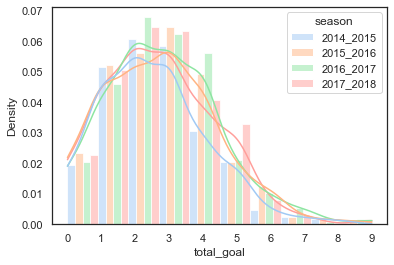

In [28]:
df['total_goal'] = df['FTHG'] + df['FTAG']
g = sns.histplot(data=df, x='total_goal', bins=10, hue='season', kde=True, stat='density', multiple='dodge');
g.set_xticks(range(10))

Text(0.5, 0, 'Full time home team goals')

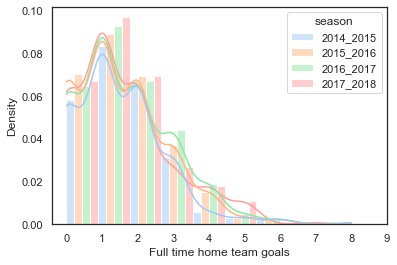

In [29]:
g = sns.histplot(data=df, x='FTHG', bins=9, hue='season', kde=True, stat='density', multiple='dodge');
g.set_xticks(range(10))
plt.xlabel('Full time home team goals')

Text(0.5, 0, 'Full time away team goals')

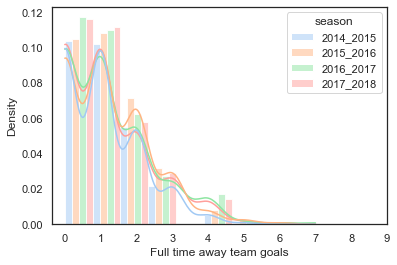

In [30]:
g = sns.histplot(data=df, x='FTAG', bins=9, hue='season', kde=True, stat='density', multiple='dodge');
g.set_xticks(range(10))
plt.xlabel('Full time away team goals')

### 2. Share of match results (Home/Draw/Away)
Playing at home seems to have a high impact on match output

Text(0.5, 1.0, 'Home-field advantage')

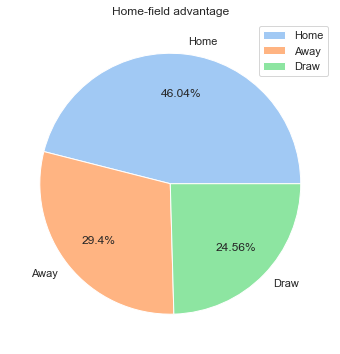

In [31]:
x = df['Match_Result'].value_counts().reset_index().drop(columns='index').squeeze()
plt.figure(figsize = (6, 6))
colors = sns.color_palette('pastel')
plt.pie(x, labels = ['Home', 'Away', 'Draw'],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.1, colors = colors
            )
plt.legend()
plt.title('Home-field advantage')

### 3. Feature estimation: illustration with the impact of the team rating on match result


As all features are estimated by computing their rolling average on the 3 previous games, the quality of the estimation is investigated here.

- Thes next graph shows the impact with the data that is known after match (rating after the result of a game is known)
We can see that in this instance, the team rating is highly linked to the match output

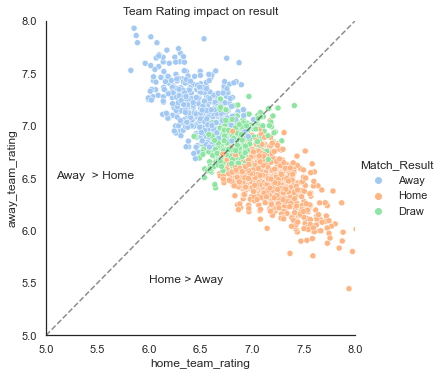

In [32]:
df_orig.rename(columns={'FTR': 'Match_Result'}, inplace = 'True')
df_orig['Match_Result'].replace(to_replace=['H', 'D', 'A'],value=['Home', 'Draw', 'Away'], inplace = True)

g = sns.relplot(x='home_team_rating', y='away_team_rating', hue = 'Match_Result', hue_order=['Away', 'Home', 'Draw'], data=df_orig);
plt.plot([5,8], [5,8], '--k', alpha = 0.5)
plt.text(5.1, 6.5,'Away  > Home') 
plt.text(6, 5.5,'Home > Away') 
plt.title('Team Rating impact on result')
plt.axis([5, 8, 5, 8]);

#### - This graph however uses the mean of team ratings on the 3 previous matchs 
We can see that in this instance, the team rating is only slightly linked to match result

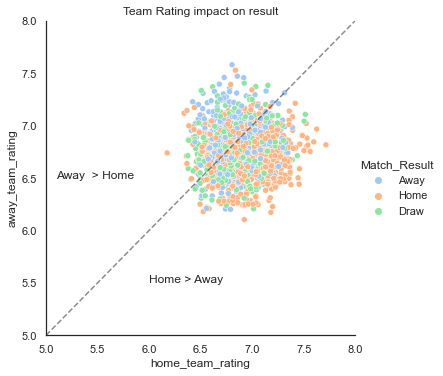

In [33]:
g = sns.relplot(x='home_team_rating', y='away_team_rating', hue = 'Match_Result', hue_order=['Away', 'Home', 'Draw'], data=df);
plt.plot([5,8], [5,8], '--k', alpha = 0.5)
plt.text(5.1, 6.5,'Away  > Home') 
plt.text(6, 5.5,'Home > Away') 
plt.title('Team Rating impact on result')
plt.axis([5, 8, 5, 8]);

### 4. Feature impact analysis
Among the available indicators, the scoring attempts variables, the possession, the ratings, and the rolling average number of goal scored (3 last games) are the most correlated to the result (see heatmaps below).

In [34]:
#fig = plt.figure(figsize=(10,6))
#plt.subplot(1,2,1)
##sns.histplot(data=df, x='home_total_scoring_att', bins=[0, 10, 20, 30, 40, 50], hue='Match_Result', multiple = 'stack');
#g = sns.histplot(data=df, x='home_total_scoring_att', bins=10, hue='Match_Result', multiple = 'dodge');
#g.set_xticks(range(0,30,5))
#plt.xlabel('Home team total scoring')
#plt.subplot(1,2,2)
##plt.xlabel('Away team total scoring')
#sns.histplot(data=df, x='away_total_scoring_att', bins=[0, 10, 20, 30, 40, 50], hue='Match_Result', multiple = 'stack');
#gg = sns.histplot(data=df, x='away_total_scoring_att', bins=10, hue='Match_Result', multiple = 'dodge');
#gg.set_xticks(range(0,30,5))
#plt.suptitle('Total scoring impact')

In [35]:
df = df.reset_index()

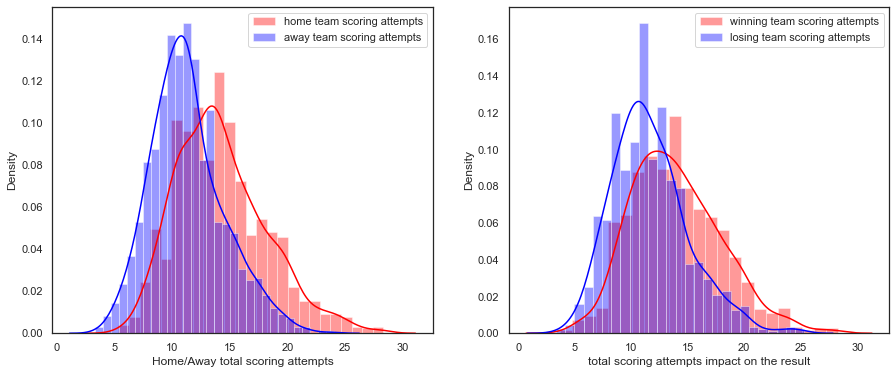

In [36]:
for ind in range(len(df)):
    if df.loc[ind,'Match_Result']=='Home':
        df.loc[ind,'total_scoring_att_winning_team'] = df.loc[ind,'home_total_scoring_att']
        df.loc[ind,'total_scoring_att_losing_team']  = df.loc[ind,'away_total_scoring_att']
    if df.loc[ind,'Match_Result']=='Away':
        df.loc[ind,'total_scoring_att_winning_team'] = df.loc[ind,'away_total_scoring_att']
        df.loc[ind,'total_scoring_att_losing_team']  = df.loc[ind,'home_total_scoring_att']
        
fig, ax1 = plt.subplots(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(a=df['home_total_scoring_att'], color='red', label='home team scoring attempts')
sns.distplot(a=df['away_total_scoring_att'], color='blue', label='away team scoring attempts')
plt.xlabel('Home/Away total scoring attempts')
plt.legend()
plt.subplot(1,2,2)
sns.distplot(a=df['total_scoring_att_winning_team'], color='red', label='winning team scoring attempts');
sns.distplot(a=df['total_scoring_att_losing_team'], color='blue', label='losing team scoring attempts');
plt.xlabel('total scoring attempts impact on the result')
plt.legend()
#sns.distplot(ax=ax1, a=df['home_total_scoring_att'], color='red', bins=10, label='home team scoring attempts');
#sns.distplot(ax=ax1, a=df['away_total_scoring_att'], color='blue', bins=10,  label='away team scoring attempts');

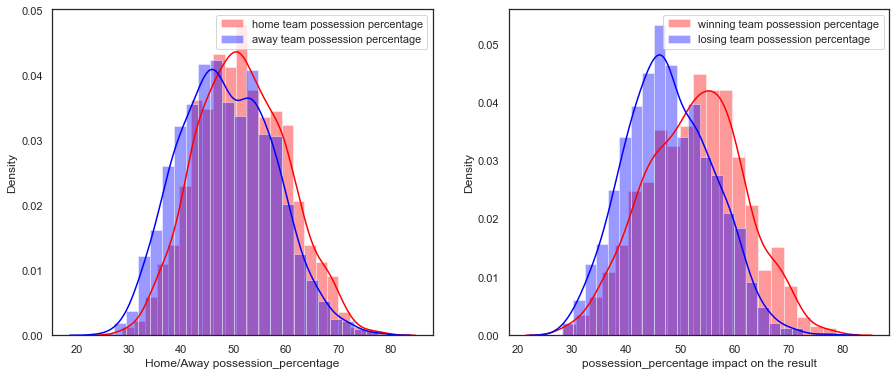

In [37]:
for ind in range(len(df)):
    if df.loc[ind,'Match_Result']=='Home':
        df.loc[ind,'possession_percentage_winning_team'] = df.loc[ind,'home_possession_percentage']
        df.loc[ind,'possession_percentage_losing_team']  = df.loc[ind,'away_possession_percentage']
    if df.loc[ind,'Match_Result']=='Away':
        df.loc[ind,'possession_percentage_winning_team'] = df.loc[ind,'away_possession_percentage']
        df.loc[ind,'possession_percentage_losing_team']  = df.loc[ind,'home_possession_percentage']
        
fig, ax1 = plt.subplots(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(a=df['home_possession_percentage'], color='red', label='home team possession percentage')
sns.distplot(a=df['away_possession_percentage'], color='blue', label='away team possession percentage')
plt.xlabel('Home/Away possession_percentage')
plt.legend()
plt.subplot(1,2,2)
sns.distplot(a=df['possession_percentage_winning_team'], color='red', label='winning team possession percentage');
sns.distplot(a=df['possession_percentage_losing_team'], color='blue', label='losing team possession percentage');
plt.xlabel('possession_percentage impact on the result')
plt.legend()
#sns.distplot(ax=ax1, a=df['home_total_scoring_att'], color='red', bins=10, label='home team scoring attempts');
#sns.distplot(ax=ax1, a=df['away_total_scoring_att'], color='blue', bins=10,  label='away team scoring attempts');

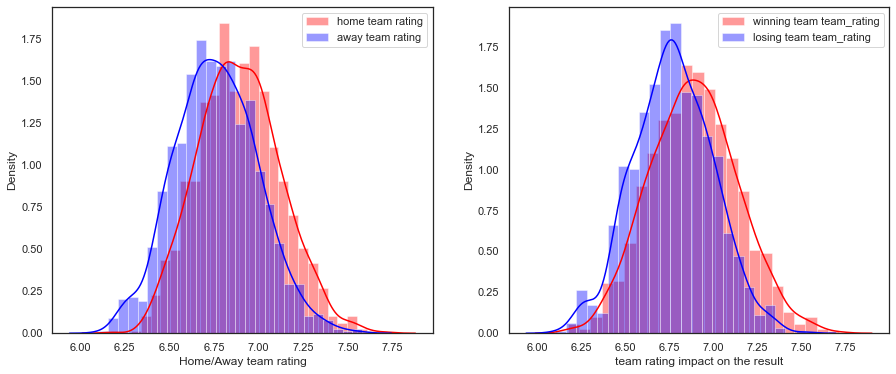

In [38]:
for ind in range(len(df)):
    if df.loc[ind,'Match_Result']=='Home':
        df.loc[ind,'team_rating_winning_team'] = df.loc[ind,'home_team_rating']
        df.loc[ind,'team_rating_losing_team']  = df.loc[ind,'away_team_rating']
    if df.loc[ind,'Match_Result']=='Away':
        df.loc[ind,'team_rating_winning_team'] = df.loc[ind,'away_team_rating']
        df.loc[ind,'team_rating_losing_team']  = df.loc[ind,'home_team_rating']
        
fig, ax1 = plt.subplots(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(a=df['home_team_rating'], color='red', label='home team rating')
sns.distplot(a=df['away_team_rating'], color='blue', label='away team rating')
plt.xlabel('Home/Away team rating')
plt.legend()
plt.subplot(1,2,2)
sns.distplot(a=df['team_rating_winning_team'], color='red', label='winning team team_rating');
sns.distplot(a=df['team_rating_losing_team'], color='blue', label='losing team team_rating');
plt.xlabel('team rating impact on the result')
plt.legend()
#sns.distplot(ax=ax1, a=df['home_total_scoring_att'], color='red', bins=10, label='home team scoring attempts');
#sns.distplot(ax=ax1, a=df['away_total_scoring_att'], color='blue', bins=10,  label='away team scoring attempts');

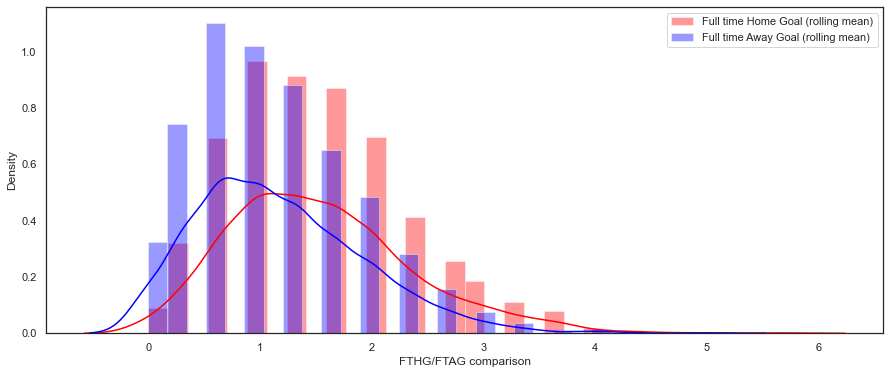

In [39]:
fig, ax1 = plt.subplots(figsize=(15,6))
sns.distplot(a=df['FTHG_mean'], color='red', label='Full time Home Goal (rolling mean)')
sns.distplot(a=df['FTAG_mean'], color='blue', label='Full time Away Goal (rolling mean)')
plt.xlabel('FTHG/FTAG comparison')
plt.legend()
#sns.distplot(ax=ax1, a=df['home_total_scoring_att'], color='red', bins=10, label='home team scoring attempts');
#sns.distplot(ax=ax1, a=df['away_total_scoring_att'], color='blue', bins=10,  label='away team scoring attempts');

### 5. Correlation heatmaps

- Correlation with the home team result
on target scoring att, possession percentage and total scoring att are the most correlated

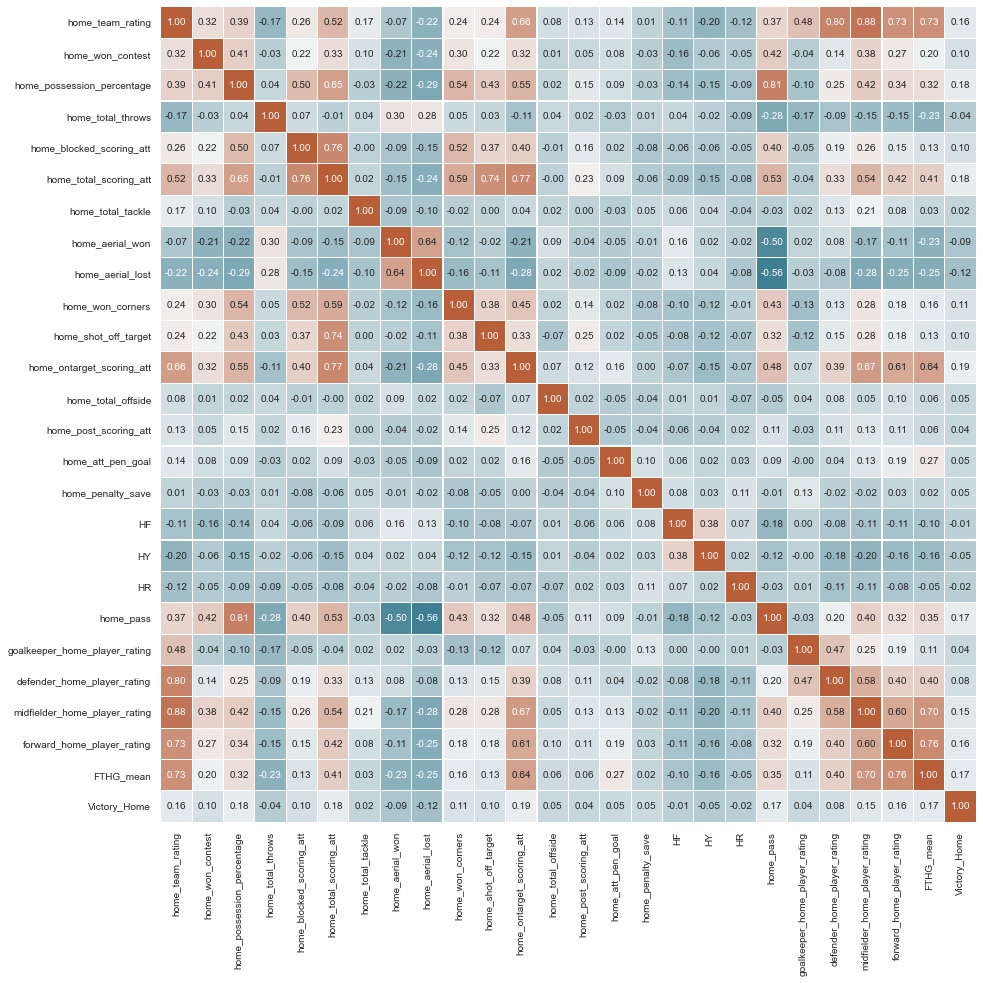

In [40]:
df_heatmap = df[['home_team_rating','home_won_contest', 'home_possession_percentage', 'home_total_throws',
         'home_blocked_scoring_att', 'home_total_scoring_att',
         'home_total_tackle', 'home_aerial_won', 'home_aerial_lost','home_won_corners',
         'home_shot_off_target', 'home_ontarget_scoring_att',
         'home_total_offside', 'home_post_scoring_att', 'home_att_pen_goal',
         'home_penalty_save', 'HF', 'HY','HR', 'home_pass', 'goalkeeper_home_player_rating',
         'defender_home_player_rating', 'midfielder_home_player_rating', 'forward_home_player_rating','FTHG_mean','Match_Result'
 ]]

df_heatmap = df_heatmap.join(pd.get_dummies(df_heatmap['Match_Result'], prefix ='Victory'))

df_heatmap = df_heatmap.drop(['Match_Result'], axis=1)

df_home = df_heatmap[['home_team_rating','home_won_contest', 'home_possession_percentage', 'home_total_throws',
         'home_blocked_scoring_att', 'home_total_scoring_att',
         'home_total_tackle', 'home_aerial_won', 'home_aerial_lost','home_won_corners',
         'home_shot_off_target', 'home_ontarget_scoring_att',
         'home_total_offside', 'home_post_scoring_att', 'home_att_pen_goal',
         'home_penalty_save', 'HF', 'HY','HR', 'home_pass', 'goalkeeper_home_player_rating',
         'defender_home_player_rating', 'midfielder_home_player_rating', 'forward_home_player_rating','FTHG_mean','Victory_Home']]

df_home = df_home.astype('float64')

cor_home = df_home.corr()
#print(cor_home)

fig, ax = plt.subplots(figsize=(15,15))
   
heatmap = sns.heatmap(cor_home, annot=True, fmt=".2f", annot_kws={"size":10}, linewidths=0.1, ax=ax, cmap = sns.diverging_palette(220, 25, as_cmap=True), cbar=False, square=True)


heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 10)
heatmap.set_yticklabels(heatmap.get_xmajorticklabels(), fontsize = 10)

plt.show()

In [41]:
top_corr_victory_home = abs(df_home.corr().loc['Victory_Home']).sort_values(ascending=False)
top_corr_victory_home.head(15)

Victory_Home                     1.000000
home_ontarget_scoring_att        0.192727
home_possession_percentage       0.178026
home_total_scoring_att           0.175732
home_pass                        0.171519
FTHG_mean                        0.165390
forward_home_player_rating       0.161681
home_team_rating                 0.157023
midfielder_home_player_rating    0.148027
home_aerial_lost                 0.122947
home_won_corners                 0.114152
home_shot_off_target             0.104918
home_won_contest                 0.101103
home_blocked_scoring_att         0.097078
home_aerial_won                  0.087157
Name: Victory_Home, dtype: float64

- Correlation with the away team result
total scoring att, possession percentage and pass are the most correlated

In [42]:
df_cor_res_home = pd.DataFrame(top_corr_victory_home[1:16].values, columns=['corr'])
df_cor_res_home['variable'] = top_corr_victory_home.index[1:16].values
df_cor_res_home['type'] = 'Home'

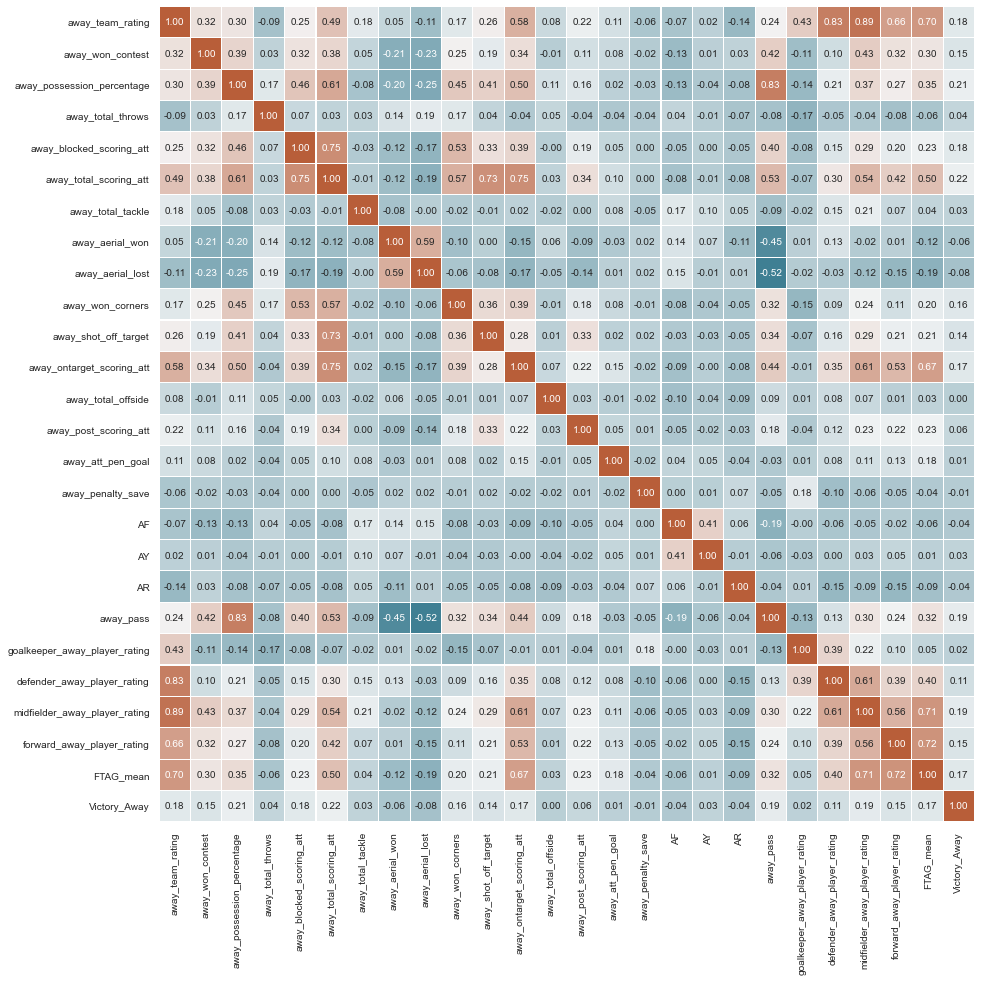

In [43]:
df_heatmap = df[['away_team_rating', 'away_won_contest', 'away_possession_percentage', 'away_total_throws',
         'away_blocked_scoring_att', 'away_total_scoring_att',
         'away_total_tackle', 'away_aerial_won', 'away_aerial_lost','away_won_corners',  
         'away_shot_off_target', 'away_ontarget_scoring_att', 
         'away_total_offside', 'away_post_scoring_att', 'away_att_pen_goal',
         'away_penalty_save', 'AF',  'AY', 'AR', 'away_pass', 'goalkeeper_away_player_rating',
         'defender_away_player_rating', 'midfielder_away_player_rating', 'forward_away_player_rating','FTAG_mean','Match_Result'
 ]]

df_heatmap = df_heatmap.join(pd.get_dummies(df_heatmap['Match_Result'], prefix ='Victory'))

df_heatmap = df_heatmap.drop(['Match_Result'], axis=1)

df_away = df_heatmap[['away_team_rating', 'away_won_contest', 'away_possession_percentage', 'away_total_throws',
         'away_blocked_scoring_att', 'away_total_scoring_att',
         'away_total_tackle', 'away_aerial_won', 'away_aerial_lost','away_won_corners',  
         'away_shot_off_target', 'away_ontarget_scoring_att', 
         'away_total_offside', 'away_post_scoring_att', 'away_att_pen_goal',
         'away_penalty_save', 'AF',  'AY', 'AR', 'away_pass', 'goalkeeper_away_player_rating',
         'defender_away_player_rating', 'midfielder_away_player_rating', 'forward_away_player_rating','FTAG_mean','Victory_Away']]

df_away = df_away.astype('float64')

cor_away = df_away.corr()
#print(cor_home)

fig, ax = plt.subplots(figsize=(15,15))
   
heatmap = sns.heatmap(cor_away, annot=True, fmt=".2f", annot_kws={"size":10}, linewidths=0.1, ax=ax, cmap = sns.diverging_palette(220, 25, as_cmap=True), cbar=False, square=True)


heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 10)
heatmap.set_yticklabels(heatmap.get_xmajorticklabels(), fontsize = 10)

plt.show()

In [44]:
top_corr_victory_away = abs(df_away.corr().loc['Victory_Away']).sort_values(ascending=False)
top_corr_victory_away.head(15)

Victory_Away                     1.000000
away_total_scoring_att           0.218562
away_possession_percentage       0.214333
away_pass                        0.191396
midfielder_away_player_rating    0.188348
away_blocked_scoring_att         0.176759
away_team_rating                 0.175056
away_ontarget_scoring_att        0.172104
FTAG_mean                        0.167371
away_won_corners                 0.161314
forward_away_player_rating       0.147684
away_won_contest                 0.145134
away_shot_off_target             0.140517
defender_away_player_rating      0.105037
away_aerial_lost                 0.084301
Name: Victory_Away, dtype: float64

In [45]:
df_cor_res_away = pd.DataFrame(top_corr_victory_away[1:16].values, columns=['corr'])
df_cor_res_away['variable'] = top_corr_victory_away.index[1:16].values
df_cor_res_away['type'] = 'Away'

- Correlation with the home team number of goals
on target scoring att, possession percentage and mean of the number of goals for past 3 matchs are the most correlated

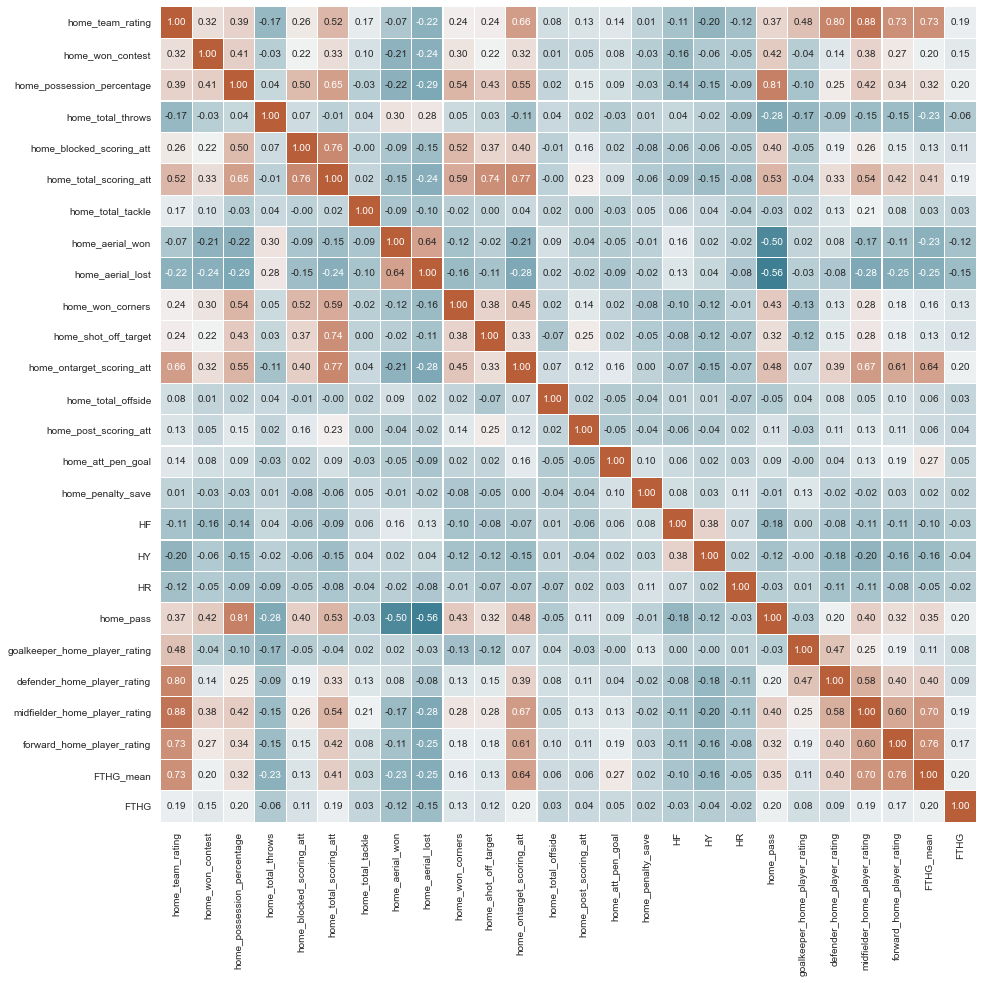

In [46]:
df_heatmap_home = df[['home_team_rating','home_won_contest', 'home_possession_percentage', 'home_total_throws',
         'home_blocked_scoring_att', 'home_total_scoring_att',
         'home_total_tackle', 'home_aerial_won', 'home_aerial_lost','home_won_corners',
         'home_shot_off_target', 'home_ontarget_scoring_att',
         'home_total_offside', 'home_post_scoring_att', 'home_att_pen_goal',
         'home_penalty_save', 'HF', 'HY','HR', 'home_pass', 'goalkeeper_home_player_rating',
         'defender_home_player_rating', 'midfielder_home_player_rating', 'forward_home_player_rating','FTHG_mean','FTHG'
 ]]


df_heatmap_home = df_heatmap_home.astype('float64')

cor_home = df_heatmap_home.corr()
#print(cor_home)

fig, ax = plt.subplots(figsize=(15,15))
   
heatmap = sns.heatmap(cor_home, annot=True, fmt=".2f", annot_kws={"size":10}, linewidths=0.1, ax=ax, cmap = sns.diverging_palette(220, 25, as_cmap=True), cbar=False, square=True)


heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 10)
heatmap.set_yticklabels(heatmap.get_xmajorticklabels(), fontsize = 10)

plt.show()

In [47]:
top_corr_goals_home = abs(cor_home.loc['FTHG']).sort_values(ascending=False)
top_corr_goals_home.head(15)

FTHG                             1.000000
home_ontarget_scoring_att        0.203067
home_possession_percentage       0.199170
FTHG_mean                        0.196695
home_pass                        0.196614
home_team_rating                 0.192072
home_total_scoring_att           0.191097
midfielder_home_player_rating    0.185508
forward_home_player_rating       0.173823
home_won_contest                 0.154308
home_aerial_lost                 0.151479
home_won_corners                 0.130948
home_shot_off_target             0.117842
home_aerial_won                  0.117708
home_blocked_scoring_att         0.108937
Name: FTHG, dtype: float64

In [48]:
df_cor_FTHG = pd.DataFrame(top_corr_goals_home[1:16].values, columns=['corr'])
df_cor_FTHG['variable'] = top_corr_goals_home.index[1:16].values
df_cor_FTHG['type'] = 'FTHG'

#### - Correlation with the away team number of goals
total scoring att, possession percentage and pass are the most correlated

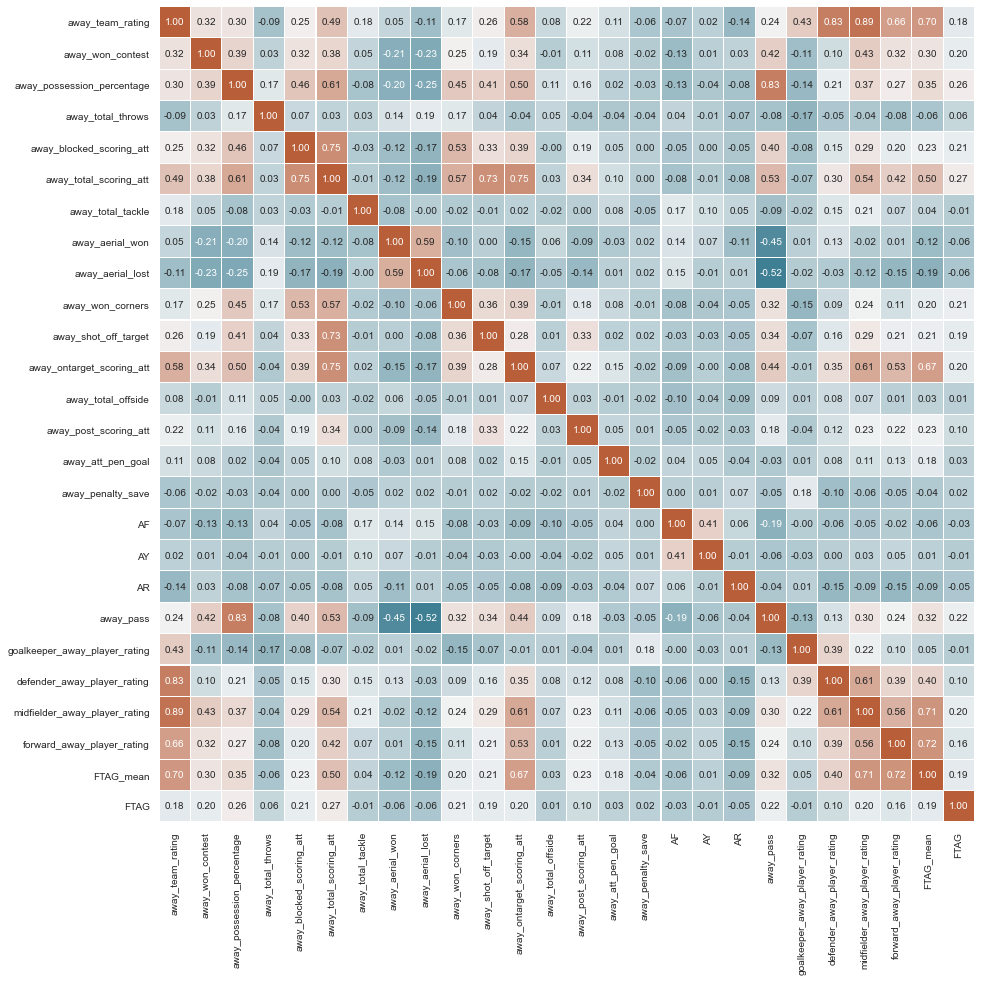

In [49]:
df_heatmap_away = df[['away_team_rating', 'away_won_contest', 'away_possession_percentage', 'away_total_throws',
         'away_blocked_scoring_att', 'away_total_scoring_att',
         'away_total_tackle', 'away_aerial_won', 'away_aerial_lost','away_won_corners',  
         'away_shot_off_target', 'away_ontarget_scoring_att', 
         'away_total_offside', 'away_post_scoring_att', 'away_att_pen_goal',
         'away_penalty_save', 'AF',  'AY', 'AR', 'away_pass', 'goalkeeper_away_player_rating',
         'defender_away_player_rating', 'midfielder_away_player_rating', 'forward_away_player_rating','FTAG_mean','FTAG'
 ]]


df_heatmap_away = df_heatmap_away.astype('float64')

cor_away = df_heatmap_away.corr()

fig, ax = plt.subplots(figsize=(15,15))
   
heatmap = sns.heatmap(cor_away, annot=True, fmt=".2f", annot_kws={"size":10}, linewidths=0.1, ax=ax, cmap = sns.diverging_palette(220, 25, as_cmap=True), cbar=False, square=True)


heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 10)
heatmap.set_yticklabels(heatmap.get_xmajorticklabels(), fontsize = 10)

plt.show()

In [50]:
top_corr_goals_away = abs(cor_away.loc['FTAG']).sort_values(ascending=False)
top_corr_goals_away.head(16)

FTAG                             1.000000
away_total_scoring_att           0.268736
away_possession_percentage       0.262489
away_pass                        0.219936
away_won_corners                 0.211516
away_blocked_scoring_att         0.205620
away_won_contest                 0.201934
away_ontarget_scoring_att        0.200803
midfielder_away_player_rating    0.200618
away_shot_off_target             0.193979
FTAG_mean                        0.186661
away_team_rating                 0.178909
forward_away_player_rating       0.160161
away_post_scoring_att            0.097257
defender_away_player_rating      0.096509
away_aerial_won                  0.063434
Name: FTAG, dtype: float64

In [51]:
df_cor_FTAG = pd.DataFrame(top_corr_goals_away[1:16].values, columns=['corr'])
df_cor_FTAG['variable'] = top_corr_goals_away.index[1:16].values
df_cor_FTAG['type'] = 'FTAG'

#### - Summary view of variable correlations with home result/away result and number of goals home/away

In [52]:
df_corrs_home = pd.concat([df_cor_res_home, df_cor_FTHG])
df_corrs_away = pd.concat([df_cor_res_away, df_cor_FTAG])

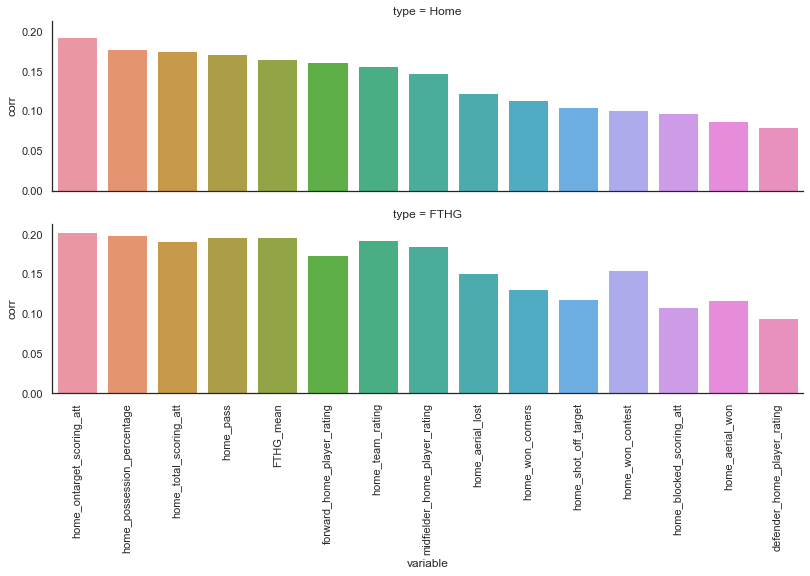

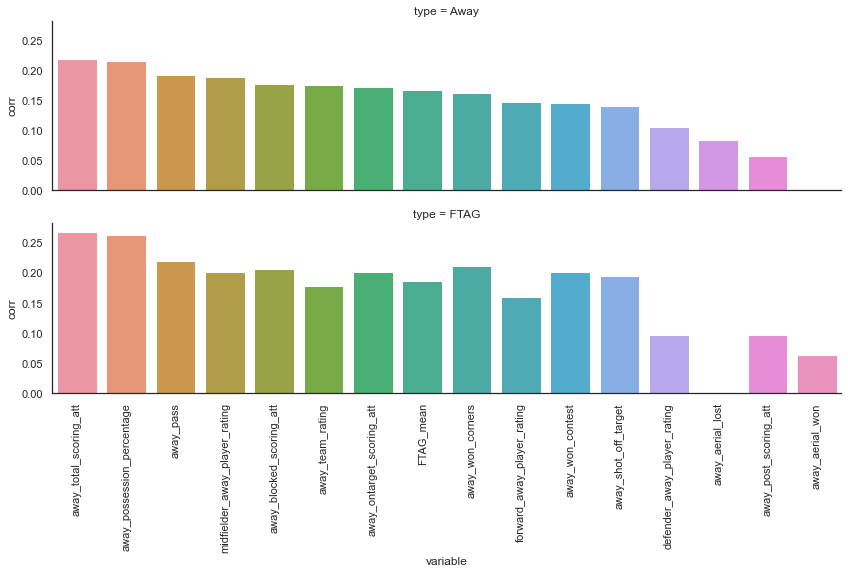

In [53]:

g = sns.catplot(x="variable", y="corr", col="type", data=df_corrs_home, kind="bar", col_wrap=1, height=3, aspect=4)
g.set_xticklabels(rotation=90)


g = sns.catplot(x="variable", y="corr", col="type", data=df_corrs_away, kind="bar", col_wrap=1, height=3, aspect=4)
g.set_xticklabels(rotation=90)



### 6. Bookmakers Prediction

In [54]:
bookmaker_list = ['B365', 'LB', 'PS', 'WH', 'VC', 'PSC']

In [55]:
# computing bookmakers results and appending related cols 

def bookmaker_results(bookmaker_name, df):

  results = []

  for i in range(len(df[bookmaker_name + 'H'])):
    if df.loc[i, [bookmaker_name + 'H', bookmaker_name + 'D', bookmaker_name + 'A']].min() == df[bookmaker_name + 'H'][i]:
         results.append('H')
    elif df.loc[i, [bookmaker_name+'H', bookmaker_name + 'D', bookmaker_name + 'A']].min() == df[bookmaker_name + 'D'][i]:
        results.append('D')
    elif df.loc[i, [bookmaker_name+'H', bookmaker_name + 'D', bookmaker_name + 'A']].min() == df[bookmaker_name + 'A'][i]:
        results.append('A')
  
  return results

In [56]:
for bookmaker in bookmaker_list:
    df[bookmaker + 'R'] = bookmaker_results(bookmaker, df)

In [57]:
df = df.reset_index(drop=True).set_index('match_id')

In [58]:
def res_cote(FTR,cote):
  return 'Correct' if cote == FTR else 'Wrong prediction'

In [59]:
numbers = df_results['FTR'].reset_index(drop=True)
df = df.reset_index(drop=True)
df = df.join(numbers)

In [61]:
bookmaker_list_R = ['B365R', 'LBR', 'PSR', 'WHR', 'VCR', 'PSCR'] 
for cote in bookmaker_list_R:
  df[f"{cote}_v"] = df.apply(lambda row: res_cote(row['FTR'],row[cote]), axis=1)

In [62]:
df

,index,season,date,away_team_id,away_team_name,home_team_id,home_team_name,home_team_rating,home_won_contest,home_possession_percentage,...,WHR,VCR,PSCR,FTR,B365R_v,LBR_v,PSR_v,WHR_v,VCR_v,PSCR_v
0,60,2014_2015,2014-10-04,167,Manchester City,24,Aston Villa,6.519762,6.333333,38.133333,...,A,A,A,A,Correct,Correct,Correct,Correct,Correct,Correct
1,61,2014_2015,2014-10-04,162,Crystal Palace,214,Hull,6.802143,8.333333,41.300000,...,H,H,H,H,Correct,Correct,Correct,Correct,Correct,Correct
2,62,2014_2015,2014-10-04,184,Burnley,14,Leicester,6.957619,8.333333,37.066667,...,H,H,H,D,Wrong prediction,Wrong prediction,Wrong prediction,Wrong prediction,Wrong prediction,Wrong prediction
3,63,2014_2015,2014-10-04,175,West Bromwich Albion,26,Liverpool,6.888462,9.333333,59.066667,...,H,H,H,H,Correct,Correct,Correct,Correct,Correct,Correct
4,64,2014_2015,2014-10-04,96,Stoke,16,Sunderland,6.697381,11.000000,44.066667,...,H,H,H,H,Correct,Correct,Correct,Correct,Correct,Correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,1515,2017_2018,2018-05-13,175,West Bromwich Albion,162,Crystal Palace,7.025037,13.333333,44.300000,...,H,H,H,H,Correct,Correct,Correct,Correct,Correct,Correct
1421,1516,2017_2018,2018-05-13,13,Arsenal,166,Huddersfield,6.500952,6.000000,52.333333,...,A,A,A,A,Correct,Correct,Correct,Correct,Correct,Correct
1422,1517,2017_2018,2018-05-13,211,Brighton,26,Liverpool,7.179725,10.000000,63.900000,...,H,H,H,H,Correct,Correct,Correct,Correct,Correct,Correct
1423,1518,2017_2018,2018-05-13,27,Watford,32,Manchester United,6.814286,11.333333,65.333333,...,H,H,H,H,Correct,Correct,Correct,Correct,Correct,Correct


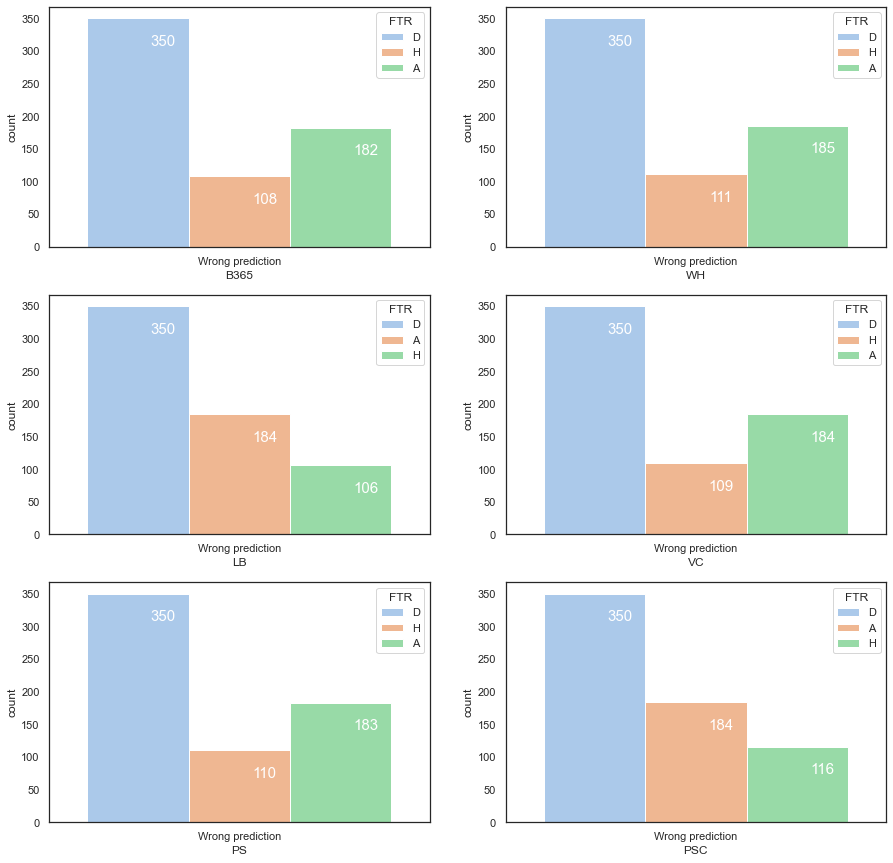

In [66]:
cols_cotes = ['B365R_v', 'LBR_v', 'PSR_v', 'WHR_v', 'VCR_v', 'PSCR_v']
f = plt.figure(figsize=(15, 15))
gs = f.add_gridspec(3, 2)
pos=0

for bm in cols_cotes:
  row = 0 if pos <=2 else 1 
  col = pos if pos <=2 else pos-3
  df_non_predit = df[df[bm] == 'Wrong prediction']
  ax = f.add_subplot(gs[col, row])
  ax = sns.countplot(x=bm, hue="FTR", data=df_non_predit)
  ax.set_xlabel(bm[:-3])
  for p in ax.patches:
      ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=15)
  pos += 1
